In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
from shutil import copyfile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd drive/My Drive/Colab Notebooks/MODEL DEPLOYMENT/

/content/drive/My Drive/Colab Notebooks/MODEL DEPLOYMENT


In [4]:
#Import API Account Kaggle
from google.colab import files
!ls -lha kaggle.json

-rw------- 1 root root 70 Nov 27 06:51 kaggle.json


In [5]:
#Need Permission
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd

/content/drive/My Drive/Colab Notebooks/MODEL DEPLOYMENT


In [6]:
#Download Dataset From Kaggle
!kaggle datasets download -d alxmamaev/flowers-recognition --force

 97% 219M/225M [00:01<00:00, 140MB/s]
100% 225M/225M [00:01<00:00, 127MB/s]


In [7]:
#Ekstrak File Dataset
!unzip flowers-recognition.zip

# extract file 
#zip_path = 'flowers-recogniton.zip'
#zip_file = zipfile.ZipFile(zip_path, 'r')
#zip_file.extractall('tmp/')
#zip_file.close()

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

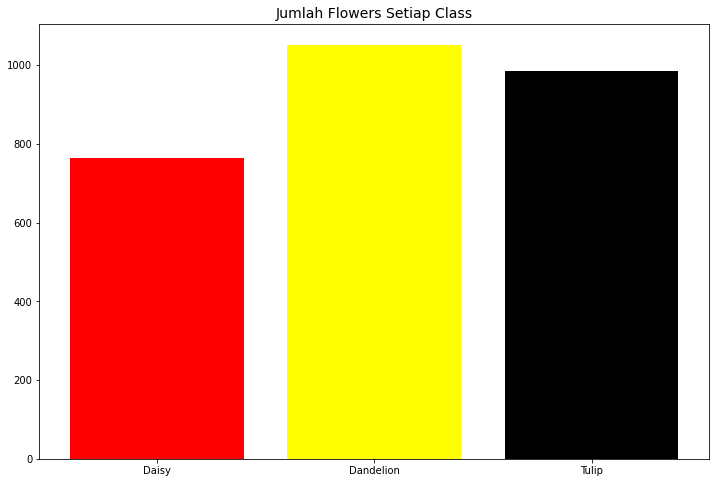

In [8]:
length = [len(os.listdir('flowers/daisy')),
         len(os.listdir('flowers/dandelion')),                  
         len(os.listdir('flowers/tulip'))]

fig = plt.figure(figsize=(12,8))
plt.bar(['Daisy','Dandelion','Tulip'], length, color=['#ff0000','#ffff00','#000000'])
plt.title('Jumlah Flowers Setiap Class', size=14)
plt.show()

In [9]:
os.mkdir('training/')
os.mkdir('testing/')

os.mkdir('training/daisy/')
os.mkdir('training/dandelion/')
os.mkdir('training/tulip/')

os.mkdir('testing/daisy/')
os.mkdir('testing/dandelion/')
os.mkdir('testing/tulip/')

DAISY_SOURCE_PATH = "flowers/daisy/"
DAISY_TRAINING_PATH = "training/daisy/"
DAISY_TESTING_PATH = "testing/daisy/"

DANDELION_SOURCE_PATH = "flowers/dandelion/"
DANDELION_TRAINING_PATH = "training/dandelion/"
DANDELION_TESTING_PATH = "testing/dandelion/"

TULIP_SOURCE_PATH = "flowers/tulip/"
TULIP_TRAINING_PATH = "training/tulip/"
TULIP_TESTING_PATH = "testing/tulip/"

In [10]:
def splitter(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    
    list_files = []
    files = os.listdir(SOURCE)

    for file_name in files:
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            list_files.append(file_name)        
    
    shuffled = random.sample(list_files, len(list_files))  
    idx = int(len(list_files) * SPLIT_SIZE)

    train_set = shuffled[:idx]  
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)

    test_set = shuffled[idx:]    
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

In [11]:
SPLIT_SIZE = .8
splitter(DAISY_SOURCE_PATH, DAISY_TRAINING_PATH, DAISY_TESTING_PATH, SPLIT_SIZE)
splitter(DANDELION_SOURCE_PATH, DANDELION_TRAINING_PATH, DANDELION_TESTING_PATH, SPLIT_SIZE)
splitter(TULIP_SOURCE_PATH, TULIP_TRAINING_PATH, TULIP_TESTING_PATH, SPLIT_SIZE)

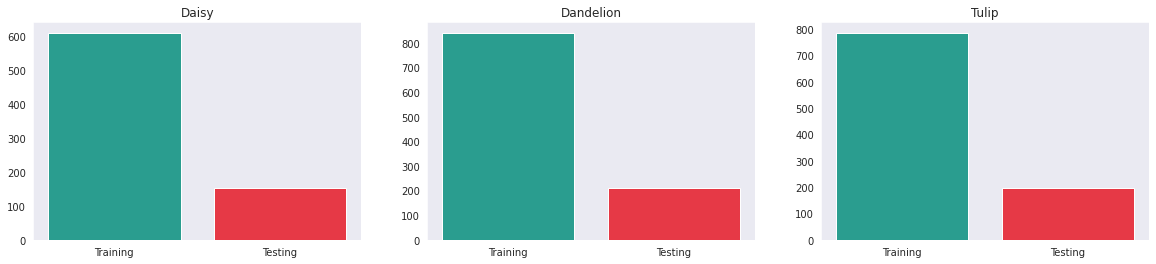

In [12]:
training = [len(os.listdir("training/daisy/")),
            len(os.listdir("training/dandelion/")),          
            len(os.listdir("training/tulip/"))]

testing = [len(os.listdir('testing/daisy/')),
           len(os.listdir('testing/dandelion/')),       
           len(os.listdir('testing/tulip/'))]

sns.set_style('dark')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(20)

ax1.set_title('Daisy')
ax1.bar(['Training','Testing'], [training[0], testing[0]], color=['#2a9d8f','#e63946'])

ax2.set_title('Dandelion')
ax2.bar(['Training','Testing'], [training[1], testing[1]], color=['#2a9d8f','#e63946'])

ax3.set_title('Tulip')
ax3.bar(['Training','Testing'], [training[2], testing[2]], color=['#2a9d8f','#e63946'])

plt.show()

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [14]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [15]:
TRAINING_DIR = 'training/'
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip = True, shear_range = 0.2,
                                   zoom_range = 0.2, fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=10,
    class_mode='categorical',
    target_size=(150, 150)
)

VALIDATION_DIR = 'testing/' 
test_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True, shear_range = 0.2,
                                   zoom_range = 0.2, fill_mode = 'nearest')

validation_generator = test_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=10,
    class_mode='categorical',
    target_size=(150, 150)
)

Found 2239 images belonging to 3 classes.
Found 561 images belonging to 3 classes.


In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nModel mencapai akurasi 85%, Proses Training di hentikan!")
      self.model.stop_training = True  
callbacks = myCallback()

In [17]:
history = model.fit(
    train_generator, 
    epochs = 100, 
    steps_per_epoch=100, 
    validation_data=validation_generator, 
    verbose=1, 
    callbacks=[callbacks])

Epoch 1/100
100/100 [==============================] - 32s 297ms/step - loss: 0.5455 - accuracy: 0.5375 - val_loss: 0.4674 - val_accuracy: 0.6257
Epoch 2/100
100/100 [==============================] - 33s 327ms/step - loss: 0.4397 - accuracy: 0.6810 - val_loss: 0.4202 - val_accuracy: 0.7041
Epoch 3/100
100/100 [==============================] - 28s 282ms/step - loss: 0.4152 - accuracy: 0.7237 - val_loss: 0.3978 - val_accuracy: 0.7201
Epoch 4/100
100/100 [==============================] - 28s 281ms/step - loss: 0.3706 - accuracy: 0.7748 - val_loss: 0.4400 - val_accuracy: 0.7041
Epoch 5/100
100/100 [==============================] - 28s 281ms/step - loss: 0.3463 - accuracy: 0.7768 - val_loss: 0.3670 - val_accuracy: 0.7469
Epoch 6/100
100/100 [==============================] - 28s 281ms/step - loss: 0.3298 - accuracy: 0.7950 - val_loss: 0.3777 - val_accuracy: 0.7487
Epoch 7/100
100/100 [==============================] - 28s 281ms/step - loss: 0.3420 - accuracy: 0.7978 - val_loss: 0.3385 -

In [18]:
score = model.evaluate(train_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

224/224 [==============================] - 31s 136ms/step - loss: 0.2500 - accuracy: 0.8481
Loss: 0.25
Accuracy: 0.85


In [19]:
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

57/57 [==============================] - 8s 135ms/step - loss: 0.2966 - accuracy: 0.7932
Loss: 0.2966
Accuracy: 0.7932


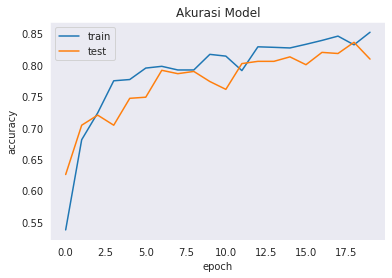

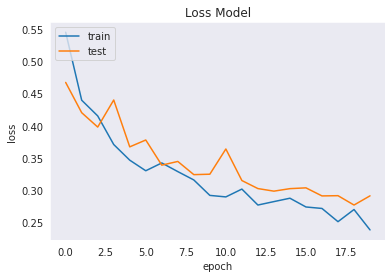

In [20]:
# Grafik Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Grafik Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Menghilangkan Warning
warnings.filterwarnings('ignore')

# Convert Model dalam format keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
#Cek Model TFlite
!ls

 flowers		   model.tflite				   testing
 flowers-recognition.zip  'Submission 3 Dwi Wahyu Effendi.ipynb'   training
 kaggle.json		   temp
